# Explore here

In [9]:
# Your code here
import shutil
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def separar_imagenes(ruta_carpeta):
    # Listamos todos los archivos en la carpeta
    archivos = os.listdir(ruta_carpeta)
    
    # Creamos las carpetas si no existen
    carpeta_dogs = os.path.join(ruta_carpeta, 'Dog')
    carpeta_cats = os.path.join(ruta_carpeta, 'Cat')
    
    if not os.path.exists(carpeta_dogs):
        os.makedirs(carpeta_dogs)
    
    if not os.path.exists(carpeta_cats):
        os.makedirs(carpeta_cats)
    
    # Iteramos sobre los archivos
    for archivo in archivos:
        archivo_completo = os.path.join(ruta_carpeta, archivo)
        
        if archivo.startswith('dog'):
            destino = carpeta_dogs
        elif archivo.startswith('cat'):
            destino = carpeta_cats
        else:
            continue  # Si no es ni perro ni gato, lo saltamos
        
        # Movemos el archivo a la carpeta correspondiente
        shutil.move(archivo_completo, destino)

In [ ]:
separar_imagenes('/Users/luiscamacho/VSCProjects/Deep_Learning2/data/raw/train')

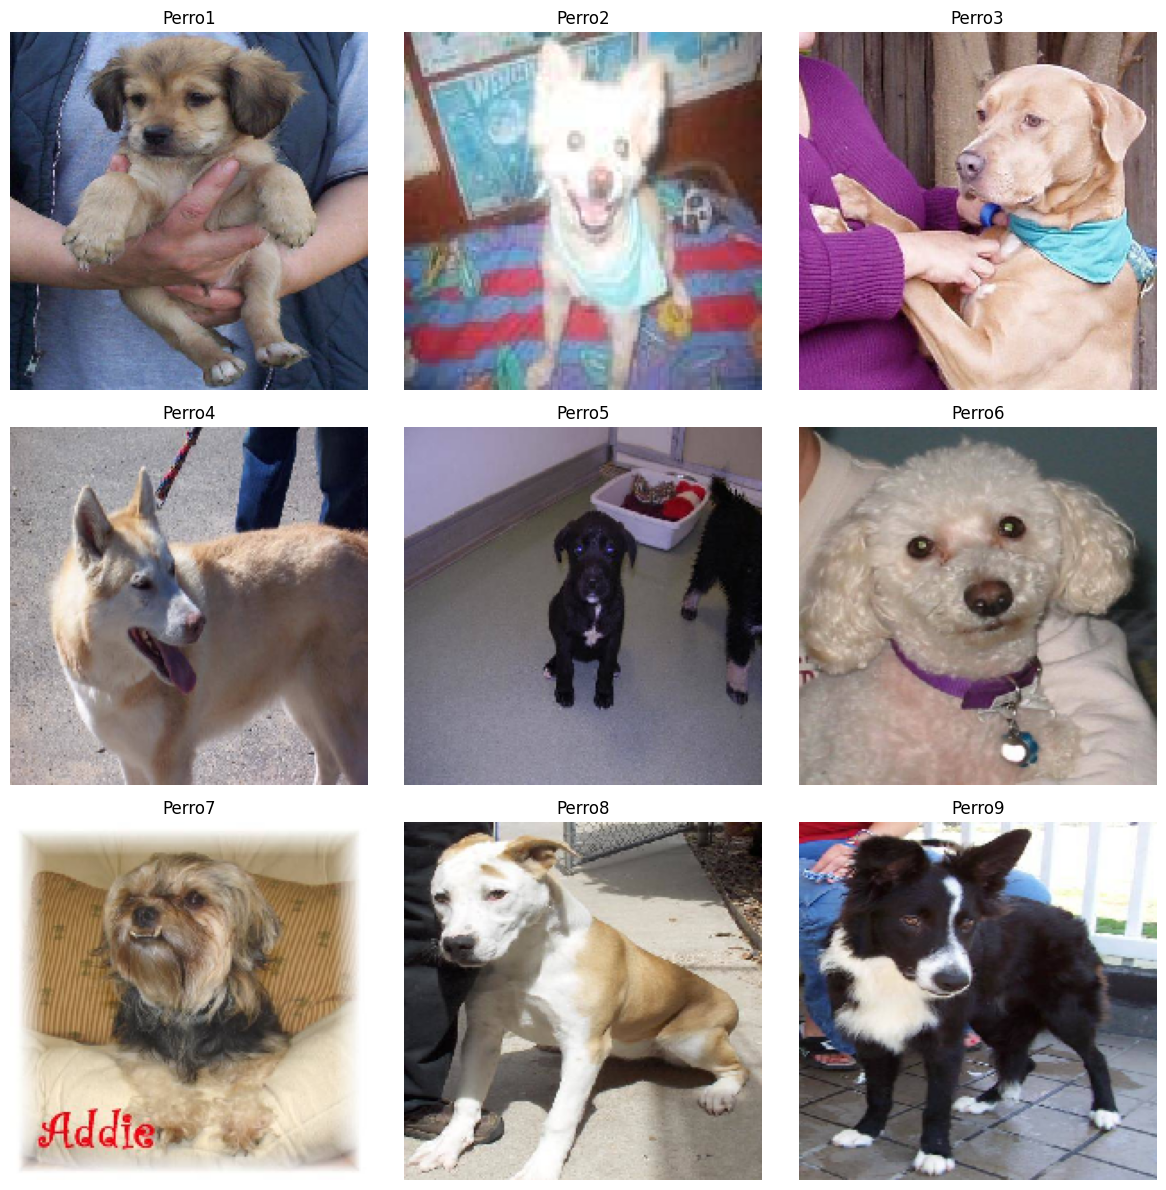

In [11]:
from keras.preprocessing import image

data_dir = '../data/raw/train'
subfolder_dog = os.path.join(data_dir,'Dog')

imagenes_perros = os.listdir(subfolder_dog)

dog_imagenes = []

for i in range(9):
    ruta_imagen = os.path.join(subfolder_dog,imagenes_perros[i])
    img = image.load_img(ruta_imagen,target_size=(200,200))
    img_array = image.img_to_array(img)
    img_array = img_array/255
    dog_imagenes.append(img_array)

plt.figure(figsize=(12,12))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(dog_imagenes[i])
    plt.axis('off')
    plt.title('Perro'+str(i+1))
plt.tight_layout()
plt.show()


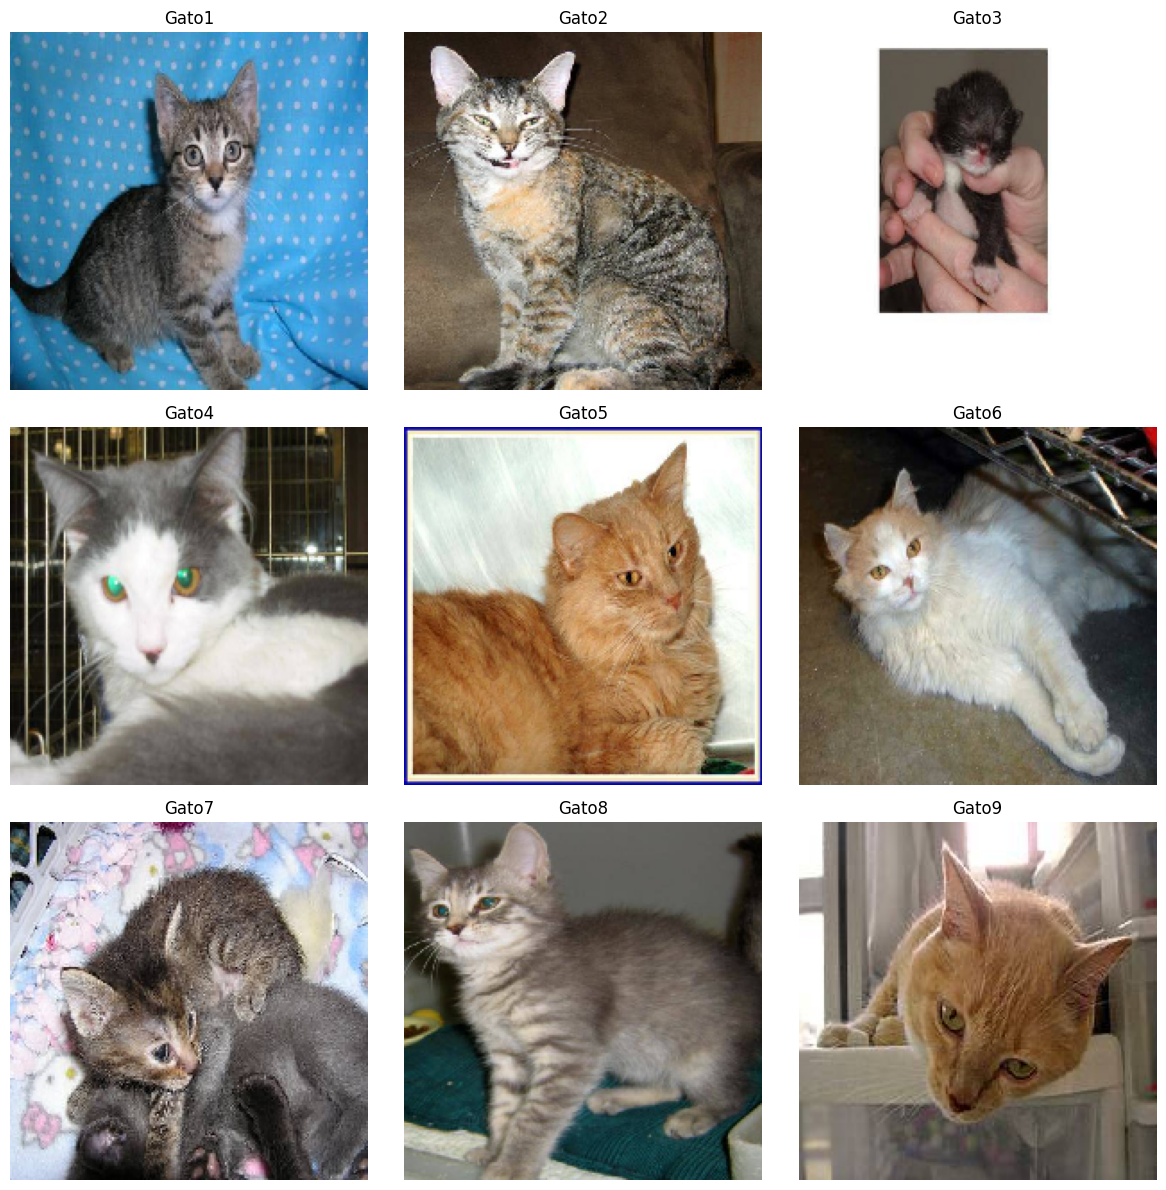

In [12]:
data_dir = '../data/raw/train'
subfolder_cat = os.path.join(data_dir,'Cat')

imagenes_gatos = os.listdir(subfolder_cat)

cat_imagenes = []

for i in range(9):
    ruta_imagen = os.path.join(subfolder_cat,imagenes_gatos[i])
    img = image.load_img(ruta_imagen,target_size=(200,200))
    img_array = image.img_to_array(img)
    img_array = img_array/255
    cat_imagenes.append(img_array)

plt.figure(figsize=(12,12))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(cat_imagenes[i])
    plt.axis('off')
    plt.title('Gato'+str(i+1))
plt.tight_layout()
plt.show()


In [15]:
from keras_preprocessing.image import ImageDataGenerator


train_dir = '../data/raw/train'
test_dir = '../data/raw'
size_imagen = (200,200)

datagen_train = ImageDataGenerator()
datagen_test = ImageDataGenerator()

data_train = datagen_train.flow_from_directory(
    train_dir,
    target_size = size_imagen,
    classes = ['Dog','Cat']
)

data_test = datagen_test.flow_from_directory(
    test_dir,
    target_size = size_imagen,
    classes = ['test1']
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
